In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad
# from tensorflow.keras.callbacks import EarlyStopping


In [3]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-23 0:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-23 0:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-23 0:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-23 0:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-23 0:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [4]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [7]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [8]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dropout(0.5))


In [9]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.4707 - accuracy: 0.2205 - val_loss: 0.0498 - val_accuracy: 0.2330
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3940 - accuracy: 0.4277 - val_loss: 0.0401 - val_accuracy: 0.2560
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3928 - accuracy: 0.4445 - val_loss: 0.0333 - val_accuracy: 0.0090
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3915 - accuracy: 0.4285 - val_loss: 0.0253 - val_accuracy: 0.0980
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3791 - accuracy: 0.4555 - val_loss: 0.0131 - val_accuracy: 0.0415
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3789 - accuracy: 0.4615 - val_loss: 0.0156 - val_accuracy: 0.1800
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3835 - accuracy: 0.4637 - val_loss: 0.0125 - val_accuracy: 0.0100
Epoch 

In [10]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.4004 - accuracy: 0.2610 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3829 - accuracy: 0.3748 - val_loss: 0.0102 - val_accuracy: 0.0010
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3817 - accuracy: 0.4350 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3810 - accuracy: 0.4725 - val_loss: 0.0095 - val_accuracy: 5.0000e-04
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3827 - accuracy: 0.4692 - val_loss: 0.0080 - val_accuracy: 0.0010
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3834 - accuracy: 0.4888 - val_loss: 0.0080 - val_accuracy: 5.0000e-04
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3802 - accuracy: 0.4705 - val_loss: 0.0086 - val_accurac

In [11]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.3816 - accuracy: 0.4855 - val_loss: 0.0064 - val_accuracy: 0.0030
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3850 - accuracy: 0.4917 - val_loss: 0.0064 - val_accuracy: 0.0030
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3791 - accuracy: 0.4768 - val_loss: 0.0064 - val_accuracy: 0.0030
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3792 - accuracy: 0.4848 - val_loss: 0.0064 - val_accuracy: 0.0030
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3776 - accuracy: 0.4782 - val_loss: 0.0065 - val_accuracy: 0.0030
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3788 - accuracy: 0.4888 - val_loss: 0.0065 - val_accuracy: 0.0030
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3781 - accuracy: 0.4750 - val_loss: 0.0065 - val_accuracy: 0.0030
Epoch 

In [12]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.0025
Test LSTM Loss:  0.005162322428077459
Test LSTM Accuracy:  0.0024999999441206455


In [13]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [14]:
gru_model = Sequential()
gru_model.add(GRU(units=64, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dropout(0.5))


In [15]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.6260 - accuracy: 0.0293 - val_loss: 0.1835 - val_accuracy: 0.0047
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.0901 - val_loss: 0.1629 - val_accuracy: 0.0020
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.1584 - val_loss: 0.1544 - val_accuracy: 6.6667e-04
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.2003 - val_loss: 0.1496 - val_accuracy: 6.6667e-04
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.2604 - val_loss: 0.1450 - val_accuracy: 0.0013
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.2954 - val_loss: 0.1423 - val_accuracy: 0.0033
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.3317 - val_loss: 0.1410 - val_accuracy: 0.000

In [16]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.4510 - accuracy: 0.4391 - val_loss: 0.1302 - val_accuracy: 0.0040
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.4403 - val_loss: 0.1293 - val_accuracy: 0.0000e+00
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.4513 - val_loss: 0.1291 - val_accuracy: 0.0067
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.4486 - val_loss: 0.1297 - val_accuracy: 0.0000e+00
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.4374 - val_loss: 0.1316 - val_accuracy: 0.0000e+00
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.4410 - val_loss: 0.1297 - val_accuracy: 0.0033
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.4423 - val_loss: 0.1320 - val_accuracy: 0

In [17]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 4ms/step - loss: 0.4510 - accuracy: 0.4564 - val_loss: 0.1300 - val_accuracy: 0.0107
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.4533 - val_loss: 0.1299 - val_accuracy: 0.0127
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.4484 - val_loss: 0.1298 - val_accuracy: 0.0100
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.4479 - val_loss: 0.1297 - val_accuracy: 0.0073
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.4483 - val_loss: 0.1297 - val_accuracy: 0.0080
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.4524 - val_loss: 0.1296 - val_accuracy: 0.0080
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.4519 - val_loss: 0.1296 - val_accuracy: 0.0073
Epoch 

In [18]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.0140
Test GRU Loss:  0.13720470666885376
Test GRU Accuracy:  0.014000000432133675


In [19]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [20]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation="relu"))

cnn_model.add(Dropout(0.5))


In [21]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5537 - accuracy: 0.3384 - val_loss: 0.2535 - val_accuracy: 0.7247
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.8453 - val_loss: 0.2451 - val_accuracy: 0.8767
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.9066 - val_loss: 0.2411 - val_accuracy: 0.8853
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.9113 - val_loss: 0.2392 - val_accuracy: 0.9227
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.9164 - val_loss: 0.2373 - val_accuracy: 0.9160
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.9211 - val_loss: 0.2376 - val_accuracy: 0.9480
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.9236 - val_loss: 0.2382 - val_accuracy: 0.9533
Epoch 

In [22]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5132 - accuracy: 0.9460 - val_loss: 0.2262 - val_accuracy: 0.9540
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.9454 - val_loss: 0.2279 - val_accuracy: 0.9553
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.9476 - val_loss: 0.2264 - val_accuracy: 0.9547
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.9480 - val_loss: 0.2267 - val_accuracy: 0.9527
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.9469 - val_loss: 0.2287 - val_accuracy: 0.9553
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.9476 - val_loss: 0.2287 - val_accuracy: 0.9553
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.9479 - val_loss: 0.2252 - val_accuracy: 0.9513
Epoch 

In [23]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5149 - accuracy: 0.9497 - val_loss: 0.2246 - val_accuracy: 0.9553
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.9497 - val_loss: 0.2248 - val_accuracy: 0.9553
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.9497 - val_loss: 0.2248 - val_accuracy: 0.9553
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.9497 - val_loss: 0.2249 - val_accuracy: 0.9553
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.9497 - val_loss: 0.2249 - val_accuracy: 0.9553
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.9497 - val_loss: 0.2249 - val_accuracy: 0.9553
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.9497 - val_loss: 0.2248 - val_accuracy: 0.9553
Epoch 

In [24]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 990us/step - loss: 0.2381 - accuracy: 0.9527
Test CNN Loss:  0.23807108402252197
Test CNN Accuracy:  0.9526666402816772


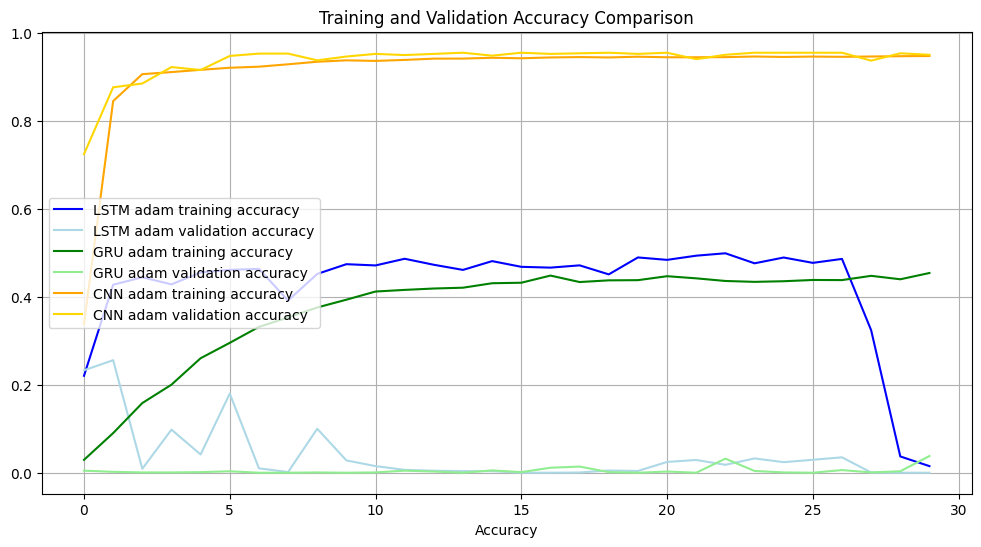

In [25]:
plt.figure(figsize=(12, 6))

plt.plot(lstm_adam_history.history["accuracy"],
         label="LSTM adam training accuracy", color='blue')
plt.plot(lstm_adam_history.history["val_accuracy"],
         label="LSTM adam validation accuracy", color='lightblue')

plt.plot(gru_adam_history.history["accuracy"],
         label="GRU adam training accuracy", color='green')
plt.plot(gru_adam_history.history["val_accuracy"],
         label="GRU adam validation accuracy", color='lightgreen')

plt.plot(cnn_adam_history.history["accuracy"],
         label="CNN adam training accuracy", color='orange')
plt.plot(cnn_adam_history.history["val_accuracy"],
         label="CNN adam validation accuracy", color='gold')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


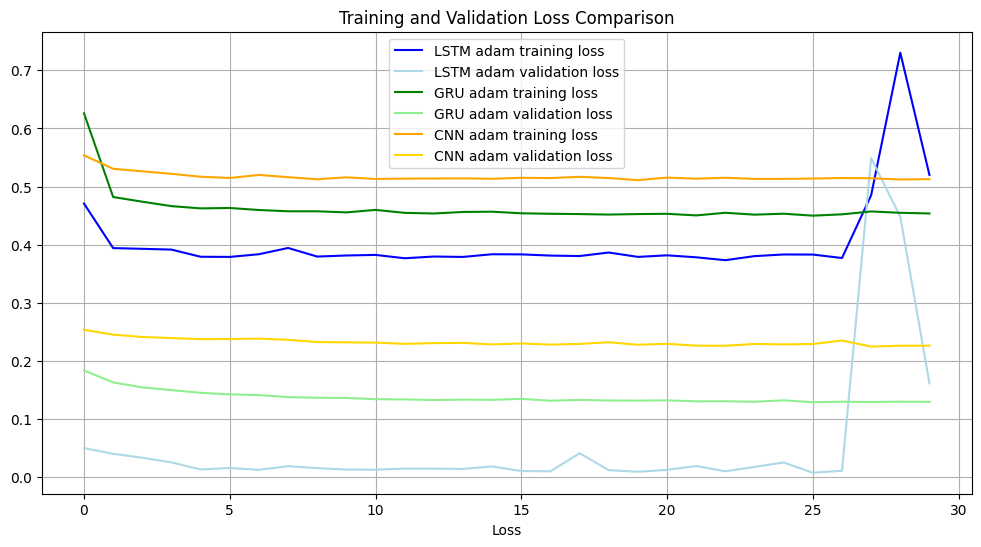

In [26]:
plt.figure(figsize=(12, 6))

plt.plot(lstm_adam_history.history["loss"],
         label="LSTM adam training loss", color='blue')
plt.plot(lstm_adam_history.history["val_loss"],
         label="LSTM adam validation loss", color='lightblue')

plt.plot(gru_adam_history.history["loss"],
         label="GRU adam training loss", color='green')
plt.plot(gru_adam_history.history["val_loss"],
         label="GRU adam validation loss", color='lightgreen')

plt.plot(cnn_adam_history.history["loss"],
         label="CNN adam training loss", color='orange')
plt.plot(cnn_adam_history.history["val_loss"],
         label="CNN adam validation loss", color='gold')

plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epoch')
plt.xlabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
